<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres, Reino Unido*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Através do Airbnb, pessoas que querem viajar, e precisam de hospedagem, são capazes de se conectar com anfitriões os quais desejam alugar seus imóveis de maneira prática e descomplicada. Assim, o Airbnb disponibiliza uma plataforma inovadora, possibilitando a existência dessa hospedagem alternativa.

Londres é uma das cidades turísticas mais famosas do mundo. Em 2018, a cidade atraiu cerca de 20 milhões de visitantes internacionais<sup><a href="https://en.wikipedia.org/wiki/Tourism_in_London">1</a></sup>. A cidade apresenta diversos pontos turísticos, como o London Eye, o Big Ben, o Palácio de Buckingham, que incluem localidades cinematográficas como, por exemplo, a estação de *King's Cross* que aparece na série de filmes ***Harry Potter***<sup><a href="https://www.visitbritainshop.com/world/en/articles/harry-potter-filming-location-guide">2</a></sup> ou a porta azul do famoso filme ***Um Lugar Chamado Notting Hill***<sup> <a href="https://homesite.co.uk/where-is-the-blue-door-from-the-film-notting-hill/">3</a></sup>.

O Airbnb tem crescido constantemente no mundo inteiro e em Londres não seria diferente. Entre 2015 e 2015, houve um aumento de 57% no número de propriedades listadas na plataforma, indo de 88.162 para 138.000 propriedades<sup><a href="https://www.hoteliernews.com.br/expansao-de-propriedades-do-airbnb-em-londres-preocupa-especialistas-saiba-mais/">4</a></sup>. Esse aumento foi tão impactante que levou à criação de regulamentações, principalmente a regra dos 90 dias criada em 2017. Essa regulamentação impõe um limite máximo de 90 dias alugados por propriedade em um ano. Caso o proprietário deseje aumentar esse limite, deve solicitar uma permissão formal ao conselho local<sup><a href="https://keynest.com/blog/airbnb-regulations-london">5</a></sup>.

Uma das iniciativas do Airbnb é disponibilizar dados do site, referentes à algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível obter uma grande quantidade de dados, os quais podem ser utilizados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="./img/airbnb.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**
  
<sup><i></i>Obs: Todos os dados analisados foram obtidos no portal Inside Airbnb (arquivo `listings.csv`). O dataset foi obtido no dia 23/02/2022, referente aos dados que foram compilados até 07/12/2021.</i></sup>

<center>
<img src="./img/london_silhouette.png" width=50%>

<sup><i>Fonte da imagem: https://www.pngwing.com</i></sup>
</center>

## Obtenção dos Dados


Primeiro, importamos os pacotes necessários e, em seguida, improtamos os dados disponibilizados pelo portal *Inside Airbnb*.

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
london_df = pd.read_csv("./data/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` = Número de id único gerado para identificar o imóvel.
* `name` = Nome da propriedade anunciada.
* `host_id` = Número de id do proprietário (anfitrião) da propriedade.
* `host_name` = Nome do anfitrião.
* `neighbourhood_group` = Grupo do bairro definido por geolocalização. Esta coluna não contém nenhum valor válido.
* `neighborhood` = Nome do bairro.
* `latitude` = Coordenada da latitude da propriedade.
* `longitude` = Coordenada da longitude da propriedade.
* `room_type` = Informa o tipo de quarto é oferecido.
* `price` = Valor diário para alugar o imóvel.
* `minimum_nights` = Quantidade mínima de noites para reservar.
* `number_of_reviews` = Número de reviews que a propriedade possui.
* `last_review` = Data do último review.
* `reviews_per_month` = Quantidade de reviews por mês.
* `calculated_host_listings_count` = Quantidade de imóveis pertencentes ao mesmo anfitrião.
* `availability_365` = A disponibilidade do imóvel num período de 365 dias futuros.
* `number_of_reviews_ltm` = Número de reviews que o imóvel possui, nos últimos 12 meses.
* `license` = O número da licensa/registro do imóvel. Esta coluna não contém nenhum valor válido.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
london_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65,1,22,2021-11-21,0.16,2,361,1,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.61,1,4,0,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,265,4,43,2021-06-28,0.33,1,295,1,NaN
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,0,NaN
4,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.91,3,0,0,NaN


Agora que temos um panorama geral de como o nosso *dataset* está preenchido, podemos começar a nossa análise.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O nosso dataset (`listings.csv`) é uma versão resumida de um dataset maior e mais completo fornecido pelo *Inside Airbnb*, que possui um número maior de variáveis análisadas (64 variáveis, pro mesmo número de entradas). Sendo assim, vamos descobrir quais as dimensões dos dados que analisaremos nesse estudo e quais os tipos das variáveis presentes.

In [5]:
# identificar o volume de dados do DataFrame
print("Nosso dataframe possui {} variáveis e {} entradas.\n\nOs tipos das variáveis são descritos abaixo:\n".format(london_df.shape[1], london_df.shape[0]))

# identificar os tipos das variáveis
london_df.dtypes

Nosso dataframe possui 18 variáveis e 66641 entradas.

Os tipos das variáveis são descritos abaixo:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Após analisar os tipos das variáveis, percebemos que a variável `last_review`, que é referente à valores de datas (conforme nosso dicionário de variáveis), está definida como texto. Portanto, converteremos essa variável para DateTime.

In [6]:
# convertendo coluna para formato DateTime
london_df.last_review = pd.to_datetime(london_df.last_review, format = "%Y-%m-%d")

# exibindo novamente os tipos para conferir
london_df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

Para melhor manuseio dos dados, conferiremos se a variável `id` possui apenas entras **únicas**, para definirmos como índice do nosso *dataframe*.

In [7]:
# checando se os ids são valores únicos
if london_df.id.is_unique:
    print("Todos os valores de id são únicos.")
else:
    print("Os valores de id não são únicos.")


Todos os valores de id são únicos.


In [8]:
# setando coluna id como índice do nosso dataframe
london_df = london_df.set_index("id")

In [9]:
london_df.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65,1,22,2021-11-21,0.16,2,361,1,NaN
15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.61,1,4,0,NaN
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,265,4,43,2021-06-28,0.33,1,295,1,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Valores ausentes comumente comprometem as análises, e a sua presença no dataset está atrelada a qualidade que aqueles dados representam para as nossas análises. Sendo assim, analisaremos a porcentagem de valores nulos presentes no nosso *dataset*.

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
london_df.isnull().sum() / london_df.shape[0]

name                              0.000360
host_id                           0.000000
host_name                         0.000885
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.278492
reviews_per_month                 0.278492
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

Com isso, podemos ver que a maioria das variáveis não possui valores ausentes. Enquanto isso, as variáveis `neighbourhood_group` e `license` estão totalmente vazias.

Já as variáveis `last_review` e `reviews_per_month` possuem ~27% dos valores ausentes. No entanto, como são variáveis que não serão de interesse na analise atual, as ignoraremos por agora. Além disso, vimos que as variáveis `name` e `host_name` também possuem entradas vazias, porém essas representam ~0.04% e ~0.09% das entradas, representando uma quantidade mínima dos anúncios.

A seguir, removemos as colunas com todos os valores ausentes:

In [11]:
# removendo colunas com 100% dos valores ausentes
london_df.drop(["neighbourhood_group", "license"], axis=1, inplace=True)
london_df.isnull().sum() / london_df.shape[0]

name                              0.000360
host_id                           0.000000
host_name                         0.000885
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.278492
reviews_per_month                 0.278492
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

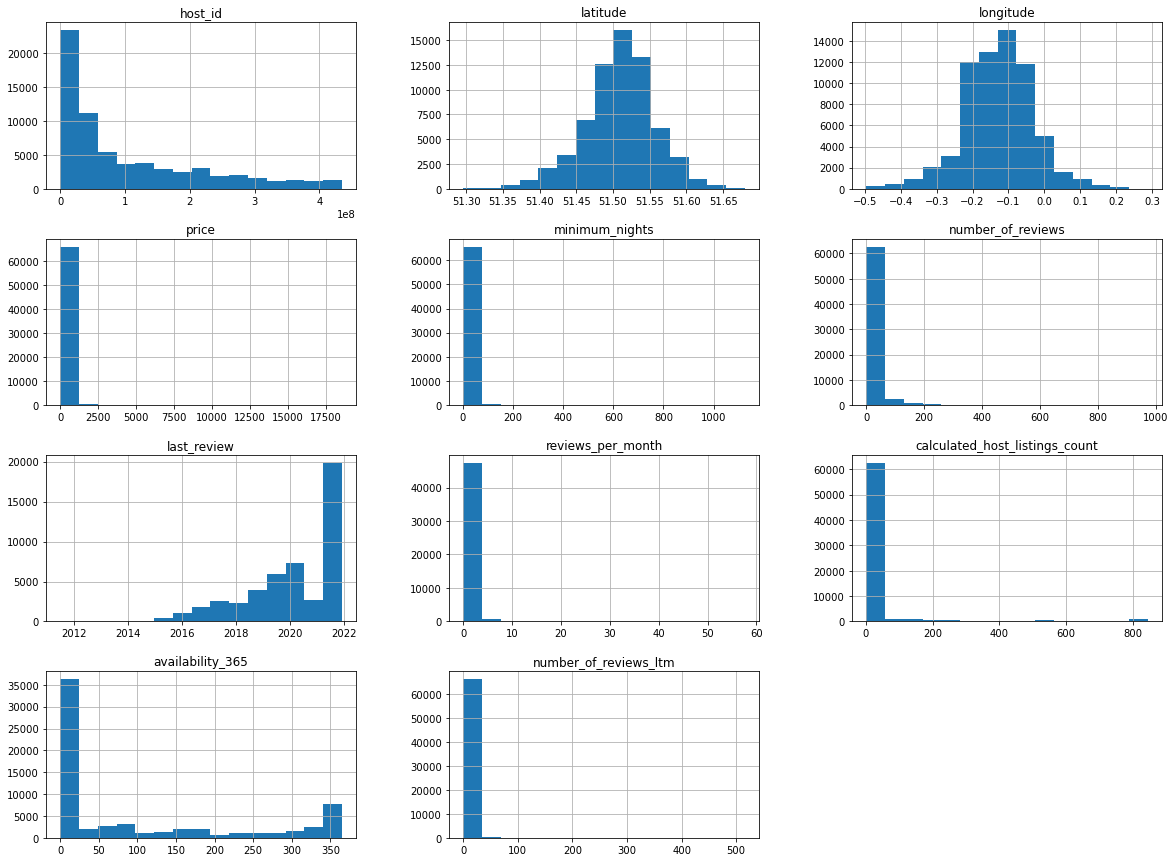

In [12]:
# plotar o histograma das variáveis numéricas
london_df.hist(bins=15, figsize=(20,15));

Ao verificar os histogramas, vemos que as variáveis `latitude` e `longitude` apresentam uma distribuição que aparentemente se aproxima de uma distribuição normal, indicando uma concentração de imóveis coordenadas indicadas pelos picos das distribuições (lat 51 lon -0.1). Isso faz sentido, uma vez que essas coordenadas correspondem ao centro de Londres (Zona 1), próximo ao rio Tâmisa, onde ficam os principais pontos turísticos. 

Além disso, podemos perceber que os dados das variáveis numéricas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365` e `numer_of_reviews_ltm` possuem outliers. Para uma melhor avaliação, vamos olhar um resumo de todas as variáveis numéricas no dataset:

In [13]:
london_df.iloc[:,2:].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,66641.000000,66641.000000,66641.000000,66641.000000,66641.000000,48082.000000,66641.000000,66641.000000,66641.000000
mean,51.509631,-0.127954,145.207230,6.654852,15.651086,0.635780,25.229979,99.679807,2.078915
std,0.048334,0.097315,349.932373,30.393704,36.777232,1.037195,109.186162,134.239988,7.466038
min,51.295937,-0.496160,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,51.482870,-0.188670,46.000000,1.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,51.513830,-0.124930,83.000000,2.000000,3.000000,0.290000,1.000000,2.000000,0.000000
75%,51.539960,-0.068960,145.000000,4.000000,14.000000,0.790000,3.000000,180.000000,1.000000
max,51.679830,0.288570,18557.000000,1125.000000,974.000000,57.660000,845.000000,365.000000,516.000000


Através dessa análise, podemos identificar que algumas variáveis possuem valores máximos muito discrepantes em relação à média e à mediana dos dados. A avaliação de algumas variáveis é mais direta. Como por exemplo, a variável `minimum_nights` que representa o número mínimo de noites para serem alugadas no imóvel.
  
Sabendo que o principal intuito do Airbnb não é alugar para grandes estadias, quantos imóveis com mínimo de noites acima de 30 nós temos no dataset?

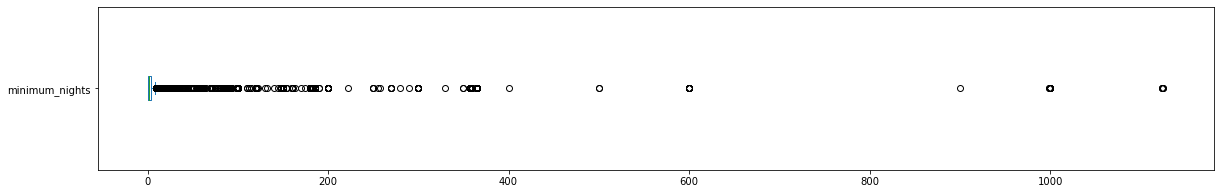

Número de imóveis com mínimo de 30 noites:	1362
Porcentagem representada por esses imóveis:	2.04%


In [14]:
# boxplot da variável
london_df.minimum_nights.plot(kind="box", vert=False, figsize=(20,3))
plt.show()

# Verificando quantidade de valores acima de 30 noites
print("Número de imóveis com mínimo de 30 noites:\t{}" .format(len(london_df[london_df.minimum_nights > 30])))
print("Porcentagem representada por esses imóveis:\t{:.2f}%" .format(len(london_df[london_df.minimum_nights > 30]) / london_df.shape[0]*100))

2% é uma quantidade razoável de entradas do dataset. Se fossemos utilizar uma métrica estatística para definir os outliers, poderíamos utilizar o padrão que é demonstrado nos boxplots de 1,5x o intervalo interquiartil (IQR) da variável. Esse limite é considerado: 

$ Q_3  + 1.5 \times IQR $, para o limite superior.

ou 

$ Q_1  - 1.5 \times IQR $, para o limite inferior.

Onde $Q_3$ corresponde ao terceiro quartil e $Q_1$ ao primeiro quartil.
  
Vamos avaliar quantas entradas entrariam em um critério um pouco mais rigoroso de 3x o IQR (menos permissivo do que o que é utilizado comumente de 1,5x), para evitar a remoção de uma grande quantidade de dados:

*<sub>Obs: Não consideraremos o limite de outliers inferiores pois esse seria um número negativo, o que não faz sentido com a variável analisada.</sub>*

In [15]:
# Verificando quantos outliers existem baseados no valor de 3x o IQR.
print("O IQR da variável minimum_nights é:\t\t{}" .format(stats.iqr(london_df.minimum_nights)))
print("O IQR * 3 representa um limite de:\t\t{}" .format(stats.iqr(london_df.minimum_nights)*3))
print("O terceiro quartil representa:\t\t\t{}" .format(np.quantile(london_df.minimum_nights, 0.75)))
print("Número de imóveis acima de 3x o IQR:\t\t{}" .format(len(london_df[london_df.minimum_nights > np.quantile(london_df.minimum_nights, 0.75) + stats.iqr(london_df.minimum_nights)*3])))
print("Porcentagem de imóveis acima de 3x o IQR:\t{:.2f}%" .format(len(london_df[london_df.minimum_nights > np.quantile(london_df.minimum_nights, 0.75) + stats.iqr(london_df.minimum_nights)*3]) / london_df.shape[0]*100))

O IQR da variável minimum_nights é:		3.0
O IQR * 3 representa um limite de:		9.0
O terceiro quartil representa:			4.0
Número de imóveis acima de 3x o IQR:		4569
Porcentagem de imóveis acima de 3x o IQR:	6.86%


O aluguel de 13 noites, ou até números um pouco maiores é razoável dentro de um contexto de hotelaria. Assim, seguiremos removendo apenas as entradas cuja estadia mínima era superior à 30 dias.

In [16]:
london_df_clean = london_df.copy()
london_df_clean.drop(london_df_clean[london_df_clean.minimum_nights > 30].index, axis=0, inplace=True)

Verifiquemos novamente a descrição dos dados:

In [17]:
london_df_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.527900e+04,65279.000000,65279.000000,65279.000000,65279.000000,65279.000000,47327.000000,65279.000000,65279.000000,65279.000000
mean,1.046452e+08,51.509559,-0.128066,144.733130,3.614164,15.752156,0.639617,24.151810,97.910170,2.111583
std,1.137855e+08,0.048494,0.097453,345.397793,4.741785,36.980126,1.043382,107.083177,133.475738,7.535464
min,2.010000e+03,51.295937,-0.496160,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.745310e+07,51.482535,-0.188805,46.000000,1.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,5.156416e+07,51.513770,-0.124940,83.000000,2.000000,3.000000,0.300000,1.000000,1.000000,0.000000
75%,1.633876e+08,51.540030,-0.069140,145.000000,4.000000,14.000000,0.790000,3.000000,179.000000,1.000000
max,4.348812e+08,51.679830,0.288570,18557.000000,30.000000,974.000000,57.660000,845.000000,365.000000,516.000000


Ainda possuímos valores muito discrepantes para algumas variáveis. As variáveis `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm` não são de extremo interesse nesse momento, uma vez que nosso principal objetivo nessa análise diz respeito aos preços dos aluguéis (variável `price`). Faremos uma análise para determinar os *outliers*. Consideraremos a mesma métrica que foi considerada para `minimum_nights`, além de um valor de fixo de 1000 libras por noite. Esse valor é um valor alto o suficiente, que não contempla a maioria das pessoas que procura o serviço de Airbnb (o que pode ser até mesmo representado pelo terceiro quartil da variável, onde 75% dos valores está abaixo de 145 libras por noite).

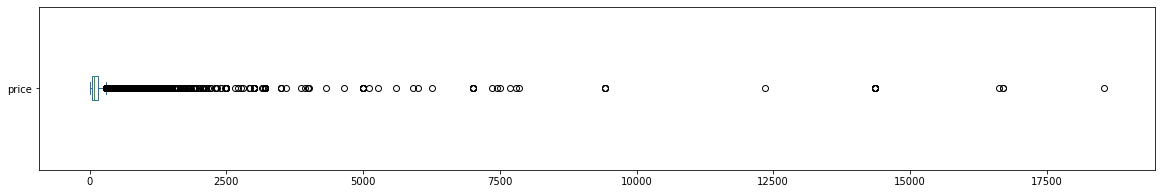

Número de imóveis ate 1000 libras por noite:	870
Porcentagem representada por esses imóveis:	1.33%


In [18]:
# boxplot da variável
london_df_clean.price.plot(kind="box", vert=False, figsize=(20,3))
plt.show()

# Verificando quantidade de valores acima de 30 noites
print("Número de imóveis ate 1000 libras por noite:\t{}" .format(len(london_df_clean[london_df_clean.price > 1000])))
print("Porcentagem representada por esses imóveis:\t{:.2f}%" .format(len(london_df_clean[london_df_clean.price > 1000]) / london_df_clean.shape[0]*100))

In [19]:
# Verificando quantos outliers existem baseados no valor de 3x o IQR.
print("O IQR da variável price é:\t\t\t{}" .format(stats.iqr(london_df_clean.price)))
print("O IQR * 3 representa um limite de:\t\t{}" .format(stats.iqr(london_df_clean.price)*3))
print("O terceiro quartil representa:\t\t\t{}" .format(np.quantile(london_df_clean.price, 0.75)))
print("Número de imóveis acima de 3x o IQR:\t\t{}" .format(len(london_df_clean[london_df_clean.price > np.quantile(london_df_clean.price, 0.75) + stats.iqr(london_df_clean.price)*3])))
print("Porcentagem de imóveis acima de 3x o IQR:\t{:.2f}%" .format(len(london_df_clean[london_df_clean.price > np.quantile(london_df_clean.price, 0.75) + stats.iqr(london_df_clean.price)*3]) / london_df_clean.shape[0]*100))

O IQR da variável price é:			99.0
O IQR * 3 representa um limite de:		297.0
O terceiro quartil representa:			145.0
Número de imóveis acima de 3x o IQR:		2876
Porcentagem de imóveis acima de 3x o IQR:	4.41%


Utilizando essa abordagem, estaríamos removendo uma quantidade grande de dados. Por isso, seguiremos com a abordagem anterior removendo apenas os valores acima de 1000.

<sub>*Obs: Também não consideraremos o limite inferior, pois esse também resultaria em um valor negativo para o preço do aluguel.*</sub>

In [20]:
london_df_clean.drop(london_df_clean[london_df_clean.price > 1000].index, axis=0, inplace=True)
london_df_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.440900e+04,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,47024.000000,64409.000000,64409.000000,64409.000000
mean,1.041453e+08,51.509509,-0.127975,118.552330,3.627055,15.934994,0.641521,22.456194,97.941639,2.131286
std,1.139176e+08,0.048663,0.097705,124.700857,4.740697,37.185521,1.045856,104.476987,133.427514,7.575103
min,2.010000e+03,51.295937,-0.496160,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.719569e+07,51.482150,-0.188980,45.000000,1.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,5.066327e+07,51.513870,-0.124850,80.000000,2.000000,3.000000,0.300000,1.000000,1.000000,0.000000
75%,1.629836e+08,51.540110,-0.068772,140.000000,4.000000,14.000000,0.800000,3.000000,179.000000,1.000000
max,4.348812e+08,51.679830,0.288570,1000.000000,30.000000,974.000000,57.660000,845.000000,365.000000,516.000000


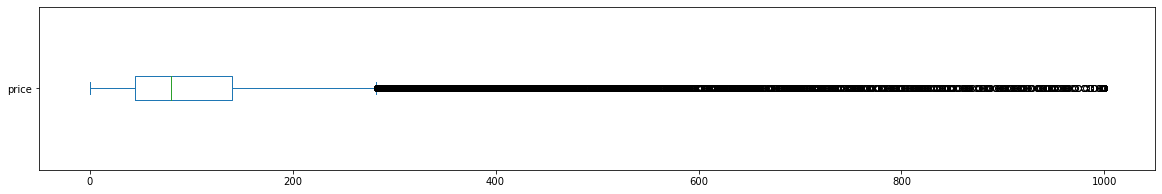

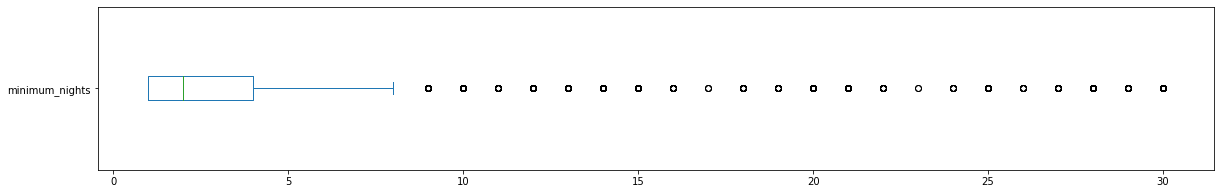

In [21]:
# novos boxplots
london_df_clean.price.plot(kind="box", vert=False, figsize=(20,3));
plt.show()
london_df_clean.minimum_nights.plot(kind="box", vert=False, figsize=(20,3));
plt.show()

### **Q4. Qual a média dos preços de aluguel?**

In [22]:
# ver a média da coluna `price``
print("A média de preço nessa localidade é de £{}.".format(round(london_df_clean.price.mean(), 2)))

A média de preço nessa localidade é de £118.55.


### **Q5. Qual a correlação existente entre as variáveis**

In [23]:
# criar uma matriz de correlação
corr = london_df_clean.corr()
# mostrar a matriz de correlação
corr.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,1.000000,-0.012584,-0.013054,0.042035,-0.035389,-0.133170,0.164927,0.004744,0.189809,0.080035
latitude,-0.012584,1.000000,0.117296,-0.018765,0.025369,-0.006984,-0.010705,-0.013479,-0.006994,-0.010497
longitude,-0.013054,0.117296,1.000000,-0.095273,0.002915,-0.032619,-0.027578,-0.054470,-0.025599,-0.022998
price,0.042035,-0.018765,-0.095273,1.000000,0.032374,-0.070694,-0.009711,0.330327,0.139646,-0.002708
minimum_nights,-0.035389,0.025369,0.002915,0.032374,1.000000,-0.069428,-0.106919,-0.048536,0.036841,-0.074921


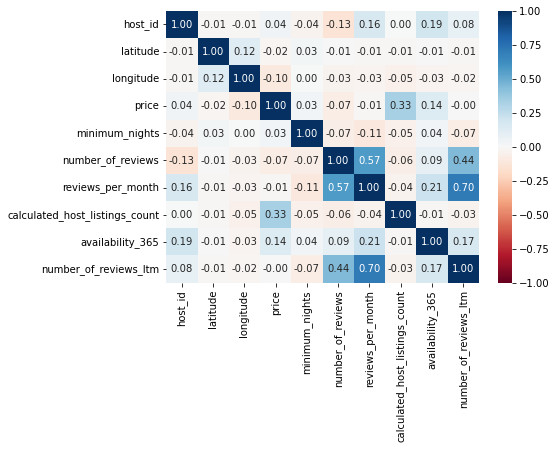

In [24]:
# plotar um heatmap a partir das correlações
plt.figure(figsize = (7,5))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdBu", annot=True, fmt=".2f");

Os dados não demonstram possuir uma correlação relevante, exceto talvez entre as variáveis `price` (preço) e `calculated_host_listings_count` (número de imóveis do mesmo proprietário), indicando que conforme um proprietário possui mais imóveis, seus preços aumentam. No entanto, essa é uma correlação positiva **fraca**.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` representa o tipo de quarto alugado no Airbnb. De acordo com o próprio *Inside Airbnb*, existem quatro tipos de entradas nessa variável:

* ***Entire home/apt*** = Casa/Apartamento inteiros.
* ***Private room*** = Quarto privado, normalmente na casa do próprio *host*.
* ***Shared room*** = Quarto compartilhado.
* ***Hotel room*** = "Quarto de Hotel". Não há uma descrição mais detalhada no site.

Sendo assim, podemos verificar através dessa variável qual o tipo de imóvel mais alugado no Airbnb na cidade de Londres:

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
london_df_clean.room_type.value_counts()

Entire home/apt    36103
Private room       27548
Shared room          505
Hotel room           253
Name: room_type, dtype: int64

In [26]:
# mostrar a porcentagem de cada tipo de imóvel disponível
london_df_clean.room_type.value_counts() / london_df_clean.shape[0]

Entire home/apt    0.560527
Private room       0.427704
Shared room        0.007841
Hotel room         0.003928
Name: room_type, dtype: float64

O tipo de imóvel mais comumente alugado é o imóvel inteiro, sendo bem próximo do quarto privativo. Esse valor se torna muito menor quando falamos de quarto compartilhado ou "quarto de hotel", os quais representam uma quantidade bem inferior dos aluguéis nessa cidade.

### **Q7. Qual a localidade mais cara do dataset?**



Quando procuramos alugar uma estadia, o ideal é encontrar um balanço entre o preço e a localização. Sendo assim, em quais localidades de Londres teríamos os maiores preços, em média, de aluguel no Airbnb?

In [27]:
# ver preços por bairros, na média
london_df_clean.groupby("neighbourhood").price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kensington and Chelsea    192.911500
Westminster               190.611624
City of London            172.946524
Camden                    138.307904
Hammersmith and Fulham    137.576803
Richmond upon Thames      131.488603
Wandsworth                128.491264
Merton                    114.590074
Islington                 113.545890
Brent                     106.403092
Name: price, dtype: float64

As duas localidades com maior preço médio de aluguel por noite são **Kensington and Chelsea** e **Westminster**. Essas duas localidades são muito próximas a pontos turísticos (Zona 1, ou Zona Central de Londres) muito visados na cidade: o *Hyde Park*, o *Buckinham Palace*, o *Victoria and Albert Museum*, a *National Gallery*, o *Big Ben* e o *London Eye*. Além disso, também são próximos de localidades famosas como o *Soho* e *Covent Garden*.

Uma outra localidade de interesse, e quarta mais cara segundo a nossa análise, é *Camden Town*. Apesar de mais longe do centro (localizada na Zona 2), também compreende alguns pontos turísticos de interesse como o *Primrose Hill Park* e o *Stables Market*, sendo esse último o local onde podemos encontrar a estátua de Amy Winehouse.

Ao plotar os dados pela latitude e longitude, podemos notar a formação de um gráfico que se assemelha ao mapa da cidade de Londres, que pode ser conferido logo abaixo. Além disso, podemos notar que os valores mais caros e discrepantes se encontram bem no meio, correspondendo de fato à região central da cidade onde se localizam os principais pontos turísticos:

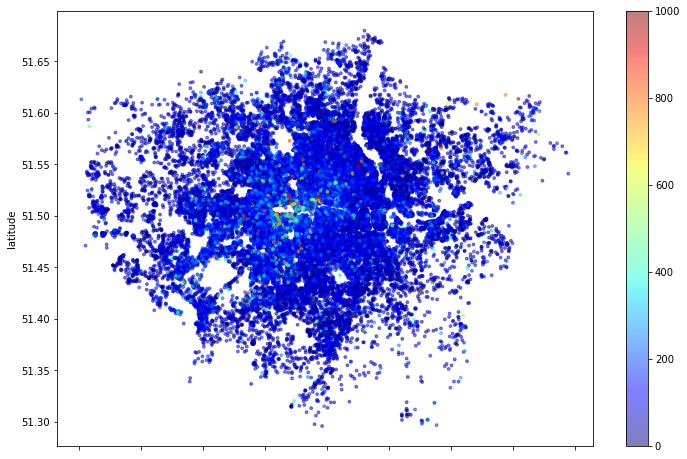

In [28]:
# plotar os imóveis pela latitude-longitude
london_df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, c=london_df_clean["price"], s=8,
                     cmap=plt.get_cmap("jet"), figsize=(12,8));

<img src="./img/london_map_wikipedia.png" width=45%/>
<br>
<sup><i>Fonte: Wikipedia.</i></sup>

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O número mínimo de noites que podem ser alugadas em algum imóvel no Airbnb pode ser um fator decisivo para efetivar o aluguel de um espaço na cidade. Esse fator é influenciado principalmente pela quantidade de dias que necessita permanecer na cidade. Sendo assim, vejamos qual é o número mínimo médio de noites a serem alugadas em Londres:

In [29]:
# ver a média da coluna `minimum_nights``
print("A média arredondada do minimo de noites é: {} noites." .format(round(london_df_clean.minimum_nights.mean())))

A média arredondada do minimo de noites é: 4 noites.


Sendo assim, se você pretende passar pelo menos 4 noites na cidade, você provavelmente terá maiores chances de encontrar o imóvel ideal. O número mínimo de noites possivelmente reflete a natureza turística da cidade, onde normalmente as pessoas se hospedam por mais dias quando estão visitando. No entanto, vale lembrar que 50% dos imóveis possuem aluguel minimo entre uma e duas noties, o que também possibilida estadias menores na cidade.

## Conclusões


Após uma análise rápida dos dados disponibilizados pelo *Airbnb*, podemos notar que existem outliers nas variáveis onde os valores de aluguel ou número mínimo de noites seriam valores muito elevados para o que normalmente se procura na plataforma.

Vimos também que as localidades mais caras de Londres estão diretamente relacionadas aos pontos turísticos mais visitados e estão localizadas na Zona 1 da cidade, a zona central. *Camden Town* é uma exceção à essa descoberta, pois está localizada na Zona 2. Entretanto, em *Camden* também estão alguns pontos turísticos muito visitados, o que justifica essa vizinhança como a quarta mais cara em nossa análise.

Sendo assim, podemos concluir que essa análise inicial nos traz informações valiosas à respeito do aluguel de espaços na cidade. No entanto, uma análise mais detalhada utilizando o dataset completo fornecido pelo portal *Inside Airbnb*, é o meio recomendado caso seja desejável retirar *insights* ainda mais valiosos.

